In [1]:
import numpy as np
import matplotlib.pyplot as plot

from sklearn import datasets, metrics, linear_model
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# During this exercise you will work on the boston dataset.
# Firstly, load the dataset
dataset = datasets.load_boston()

# The result of load_boston() is a map-like object with four components.
# analyse the dataset
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
# Analyse the components and choose the variables and targets.
# Load the data as a pandas data frame for easier analysis and set the median home value as our target variable:
boston = DataFrame(data=dataset.data, columns=dataset.feature_names)
x, y = boston, dataset.target

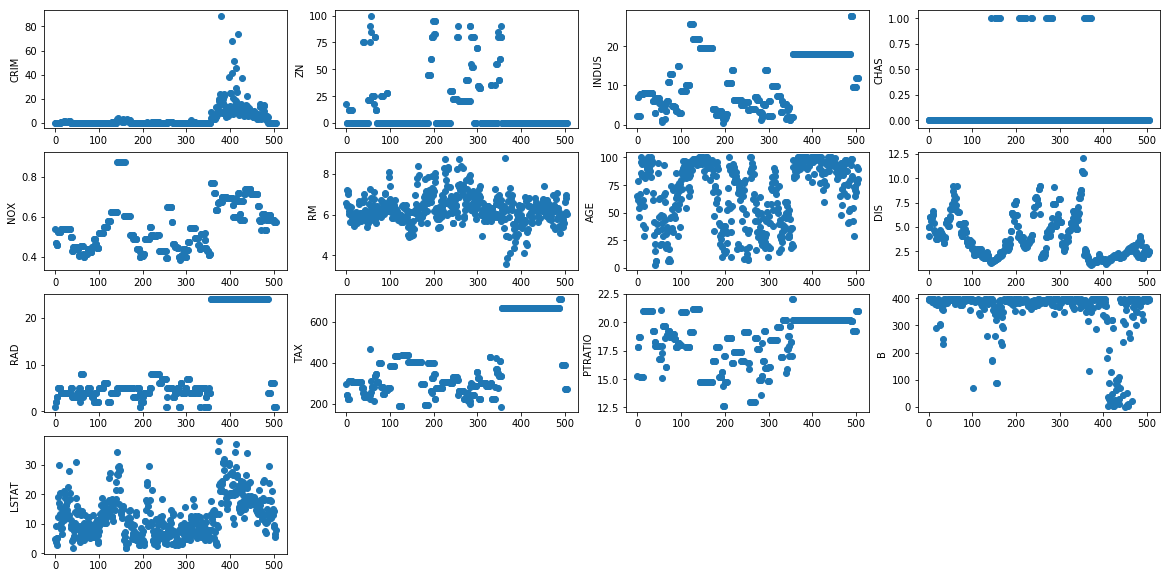

In [4]:
# Now, plot the variables and the target (use the plt.scatter()):
plot.figure(1, figsize=(20, 10))
for index, feature_name in enumerate(dataset.feature_names):
    plot.subplot(4, 4, index+1)
    plot.ylabel(feature_name)
    plot.scatter(list(range(boston.shape[0])), boston[feature_name])

In [5]:
# Use train_test_split from sklearn.cross_validation to shuffle and split the features and prices data 
#    into training and testing sets. Split the data into 75% training and 25% testing:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, test_size=0.25)

In [6]:
# And finally, to train the algorithm we execute the same code as before, using the fit() 
#    method of the LinearRegression class:
# Analyse which coefficients our regression model has chosen

reg = LinearRegression().fit(x_train, y_train)
result_lin = reg.predict(x_test)

mse_lin = metrics.mean_squared_error(y_test, result_lin)
r2_lin = metrics.r2_score(y_test, result_lin)
print(f'LinearRegression - mean_squared_error: {mse_lin}, r2_score: {r2_lin},\n coef: {reg.coef_}')

LinearRegression - mean_squared_error: 24.123920215307383, r2_score: 0.6864756763598117,
 coef: [-8.94413398e-02  5.49850345e-02 -1.25710095e-02  3.56727542e+00
 -1.69341230e+01  4.08349880e+00 -1.01094810e-02 -1.55072842e+00
  3.61985132e-01 -1.57005516e-02 -9.46490791e-01  1.01578271e-02
 -4.56151772e-01]


In [7]:
# We will use the sklearn package in order to perform ridge regression and the lasso. 
#    The main functions in this package that we care about are Ridge(), which can be used to fit 
#    ridge regression models, and Lasso() which will fit lasso models. They also have cross-validated 
#    counterparts: RidgeCV() and LassoCV(). We’ll use these a bit later.
# The Ridge() function has an alpha argument (λ, but with a different name!) that is used to tune 
#    the model.Use the linear_model.Ridge() with alpha = .5 to compute the model. As with other linear models, 
#    Ridge will take in its fit method arrays X, y and will store the coefficients of the linear model in its 
#    coef_ member:
ridge = linear_model.Ridge(alpha=0.5).fit(x_train, y_train)
result_ridge = ridge.predict(x_test)

mse_ridge = metrics.mean_squared_error(y_test, result_ridge)
r2_ridge = metrics.r2_score(y_test, result_ridge)
print(f'ridge - mean_squared_error: {mse_ridge}, r2_score: {r2_ridge},\n coef: {ridge.coef_}')

ridge - mean_squared_error: 24.320051565152404, r2_score: 0.6839266732021169,
 coef: [-8.55834429e-02  5.58326348e-02 -3.70673299e-02  3.47541327e+00
 -1.17207687e+01  4.11623467e+00 -1.43779251e-02 -1.47381145e+00
  3.51335915e-01 -1.62715850e-02 -8.85198491e-01  1.03098092e-02
 -4.63087451e-01]


In [8]:
# Another penalization approach, called Lasso (least absolute shrinkage and selection operator), 
#   can set some coefficients to zero. Such methods are called sparse method. 
#   Use the linear_model.Lasso() with alpha = .5 to compute the model. As with other linear models, 
#   Ridge will take in its fit method arrays X, y and will store the coefficients of the linear model in 
#   its coef_ member:
lasso = linear_model.Lasso(alpha=0.5).fit(x_train, y_train)
result_lasso = lasso.predict(x_test)

mse_lasso = metrics.mean_squared_error(y_test, result_lasso)
r2_lasso = metrics.r2_score(y_test, result_lasso)
print(f'lasso - mean_squared_error: {mse_lasso}, r2_score: {r2_lasso},\n coef: {lasso.coef_}')

lasso - mean_squared_error: 24.227995841290813, r2_score: 0.6851230670014381,
 coef: [-7.29149694e-02  6.36948349e-02 -5.07334615e-02  0.00000000e+00
 -0.00000000e+00  2.63294613e+00 -1.44060156e-03 -1.06615495e+00
  3.59581571e-01 -2.00418130e-02 -7.45781239e-01  9.98783599e-03
 -5.95056177e-01]


In [9]:
# Instead of arbitrarily choosing alpha, it would be better to use cross-validation to choose the tuning parameter alpha. We can do this using the cross-validated ridge regression function, RidgeCV().
alphas = np.arange(0.01, 10.0, 0.01)
ridgecv = linear_model.RidgeCV(alphas=alphas, scoring="neg_mean_squared_error", normalize=True)
ridgecv.fit(x_train, y_train)
lassocv = linear_model.LassoCV(alphas=alphas, normalize=True)
lassocv.fit(x_train, y_train)
print(ridgecv.alpha_, lassocv.alpha_)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.01 0.01


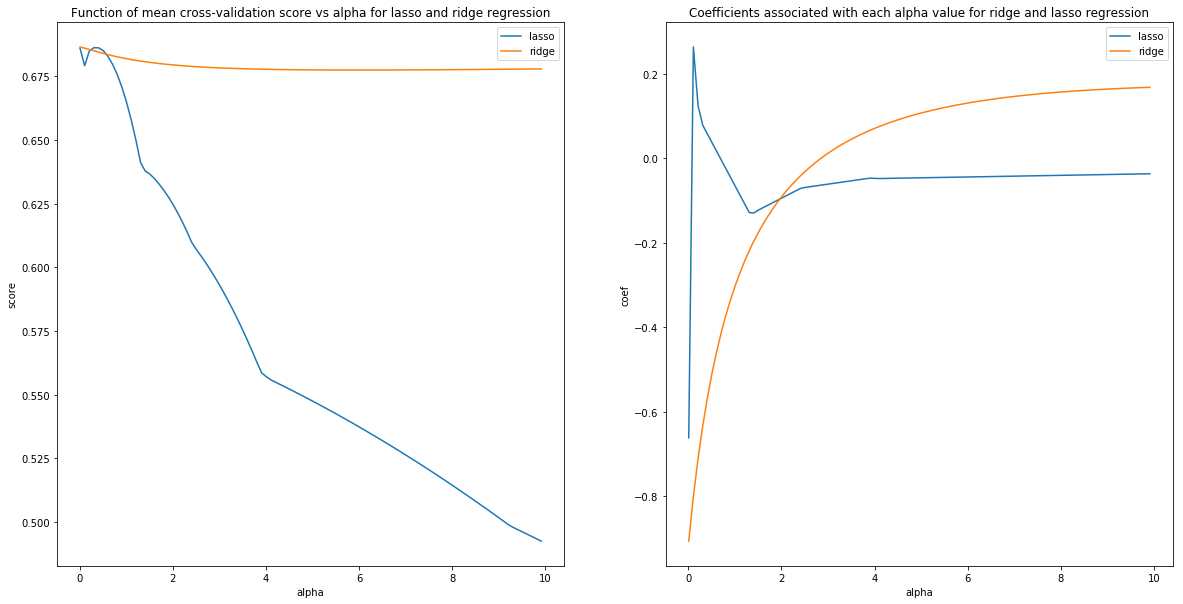

In [10]:
alphas = np.arange(0.01, 10.0, 0.1)
# ridge and lasso regression
lassos = [linear_model.Lasso(alpha=alpha).fit(x_train, y_train).score(x_test, y_test) for alpha in alphas]
ridges = [linear_model.Ridge(alpha=alpha).fit(x_train, y_train).score(x_test, y_test) for alpha in alphas]
plot.figure(2, figsize=(20, 10))
sub1 = plot.subplot(121)
# plot a function of mean cross-validation score vs alpha for lasso and ridge regression
sub1.set_title('Function of mean cross-validation score vs alpha for lasso and ridge regression')
sub1.plot(alphas, lassos, label="lasso")
sub1.plot(alphas, ridges, label="ridge")
sub1.set_ylabel("score")
sub1.set_xlabel("alpha")
sub1.legend()

# plot coefficients associated with each alpha value for ridge and lasso regression
sub2 = plot.subplot(122)
sub2.set_title('Coefficients associated with each alpha value for ridge and lasso regression')
lassos_coef = [linear_model.Lasso(alpha=alpha).fit(x_train, y_train).coef_.mean() for alpha in alphas]
ridges_coef = [linear_model.Ridge(alpha=alpha).fit(x_train, y_train).coef_.mean() for alpha in alphas]
sub2.plot(alphas, lassos_coef, label="lasso")
sub2.plot(alphas, ridges_coef, label="ridge")
sub2.set_ylabel("coef")
sub2.set_xlabel("alpha")
sub2.legend()